In [111]:
from scipy import stats
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib
BASE_PATH = './updatedNeatCXRuns/'

In [112]:
plt.rcParams.update({'figure.figsize':'12.4,9.6', 'font.size': '18'})

In [150]:
def get_data(paths):
    data = {}
    for p in paths:
        data[p] = {'hyp': [], 'bloat': []}
        with open(p) as f:
            reader = csv.reader(f)
            next(reader, None) # skip header
            for row in reader:
                data[p]['bloat'].append(float(row[2]))
                data[p]['hyp'].append(float(row[3]))
    return data

def get_last_gen_data(data):
    min_gen = min([len(data[p]['bloat']) - 1 for p in data.keys()])
    print(min_gen)
    bloat = [data[p]['bloat'][min_gen] for p in data.keys()]
    hyp = [data[p]['hyp'][min_gen] for p in data.keys()]
    
    return bloat, hyp

def analyze(baseline, test):
    s = stats.ttest_ind(baseline, test, equal_var=False)
    return np.mean(baseline), np.mean(test), s.pvalue / 2

def get_stats_per_gen(data, key, num_gens):
    mean = []
    std_above = []
    std_below = []
    
    for i in range(num_gens):
        gen = []
        for path in data.keys():
            gen.append(data[path][key][i])
         
        gen_mean = np.mean(gen)
        std = np.std(gen)
        mean.append(gen_mean)
        std_above.append(gen_mean + std)
        std_below.append(gen_mean - std)
    return mean, std_above, std_below

def plot(baseline, test, title, y_name, test_name, out_name, start_gen, log=False):
    max_x = start_gen + min(len(baseline[0][start_gen:]), len(test[0][start_gen:]))
    if log:
        plt.semilogy(range(start_gen, max_x), baseline[0][start_gen:max_x], 'b', label='Baseline')
        plt.semilogy(range(start_gen, max_x), test[0][start_gen:max_x], 'r', label=test_name)
        plt.gca().fill_between(range(start_gen, max_x), baseline[1][start_gen:max_x], baseline[2][start_gen:max_x], color='b', alpha=.2)
        plt.gca().fill_between(range(start_gen, max_x), test[1][start_gen:max_x], test[2][start_gen:max_x], color='r', alpha=.2)
        plt.grid(True, which='both')
        plt.gca().yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
        plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
    else:
        plt.plot(range(start_gen, max_x), baseline[0][start_gen:max_x], 'b', label='Baseline')
        plt.plot(range(start_gen, max_x), test[0][start_gen:max_x], 'r', label=test_name)
        plt.gca().fill_between(range(start_gen, max_x), baseline[1][start_gen:max_x], baseline[2][start_gen:max_x], color='b', alpha=.2)
        plt.gca().fill_between(range(start_gen, max_x), test[1][start_gen:max_x], test[2][start_gen:max_x], color='r', alpha=.2)
        plt.grid(False, which='both')
        plt.gca().yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
        plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
    plt.xlabel('Generation')
    plt.ylabel(y_name)
    plt.title(title)
    plt.legend(frameon=True)
    
    #plt.show()
    plt.savefig(BASE_PATH + out_name)
    plt.clf()
    

In [151]:
import glob 
baseline_paths = glob.glob(BASE_PATH + 'Baseline_*/bloat.csv')
baseline_data = get_data(baseline_paths)
baseline_bloat, baseline_hyp = get_last_gen_data(baseline_data)

29


In [152]:
pathsneatcx = glob.glob(BASE_PATH + 'NeatCX_*/bloat.csv')
neatcx_data = get_data(pathsneatcx)
neatcx_bloat, neatcx_hyp = get_last_gen_data(neatcx_data)
print(analyze(baseline_bloat, neatcx_bloat))
print(analyze(baseline_hyp, neatcx_hyp))

30
(-0.09184938000000001, -0.0648778090909091, 0.3665065846560759)
(3870.7759999999994, 5811.516363636364, 0.0288293227643098)


In [153]:
baseline_hyp_stats = get_stats_per_gen(baseline_data, 'hyp', 30)
baseline_bloat_stats = get_stats_per_gen(baseline_data, 'bloat', 30)
neatcx_hyp_stats = get_stats_per_gen(neatcx_data, 'hyp', 30)
neatcx_bloat_stats = get_stats_per_gen(neatcx_data, 'bloat', 30)
plot(baseline_hyp_stats, neatcx_hyp_stats, 'Average Hypervolume by Generation for Neat Crossover', 'Hypervolume', 'Neat Crossover', 'plots/neatcx_hyp.png', 0, log=True)
plot(baseline_bloat_stats, neatcx_bloat_stats, 'Average Bloat by Generation for Neat Crossover', 'Bloat', 'Neat Crossover', 'plots/neatcx_bloat.png', 1, False)

<Figure size 892.8x691.2 with 0 Axes>

In [117]:
print('Baseline Bloat: {}'.format(np.std(baseline_bloat)))
print('Baseline Hyp:   {}'.format(np.std(baseline_hyp)))
print('Neat CX       Bloat: {}'.format(np.std(neatcx_bloat)))
print('Neat CX       Hyp:   {}'.format(np.std(neatcx_hyp)))

Baseline Bloat: 0.21855598662527093
Baseline Hyp:   2110.6660163806114
Neat CX       Bloat: 0.07988497123684614
Neat CX       Hyp:   2063.261825535976


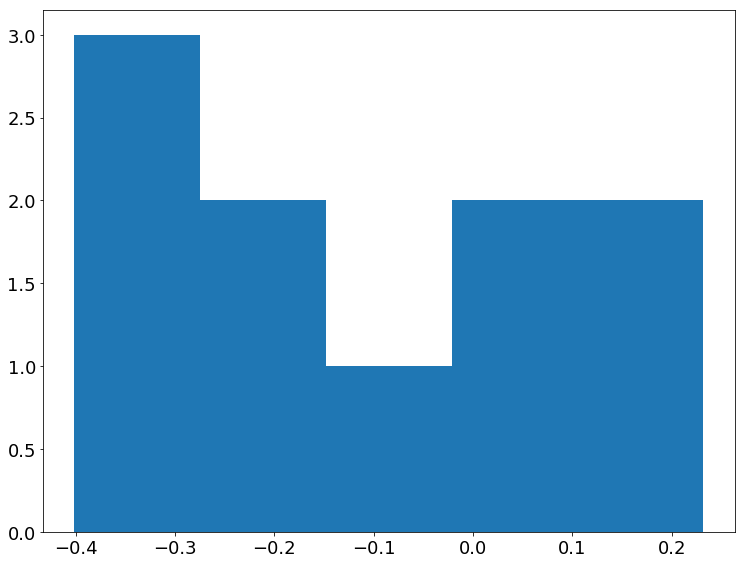

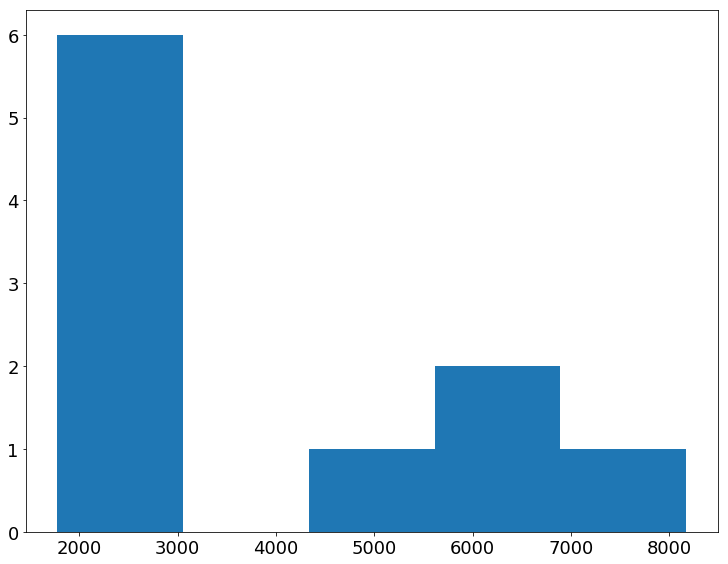

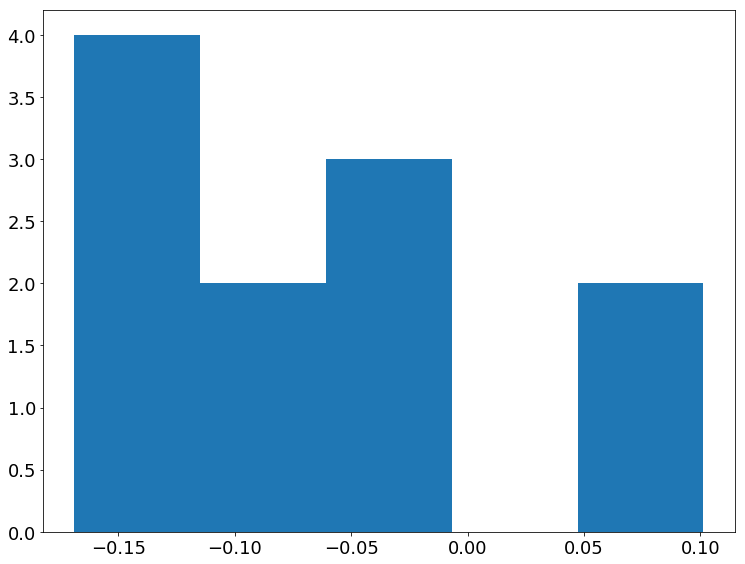

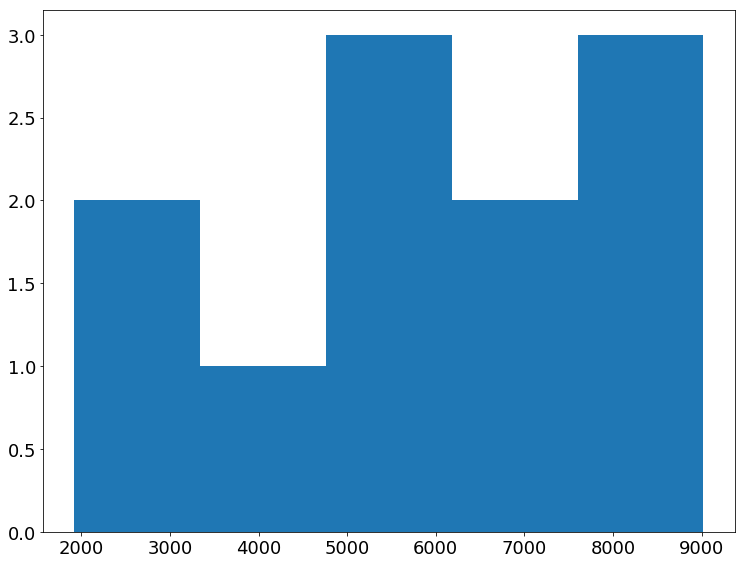

In [25]:
"""plt.scatter(range(len(baseline_bloat)), sorted(baseline_bloat))
plt.show()
plt.scatter(range(len(baseline_hyp)), sorted(baseline_hyp))
plt.show()
plt.scatter(range(len(thresh15_hyp)), sorted(thresh15_hyp))"""
plt.hist(baseline_bloat, bins='auto')
plt.show()
plt.hist(baseline_hyp, bins='auto')
plt.show()
plt.hist(neatcx_bloat, bins='auto')
plt.show()
plt.hist(neatcx_hyp, bins='auto')
plt.show()